In [1]:
import numpy as np
import pandas as pd

In [2]:
# Importing matplotlib for plotting functions
import matplotlib.pyplot as  plt

In [3]:
df_train = pd.read_csv("data/train.csv")

In [4]:
# Peek at the first few rows
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [5]:
df_train.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


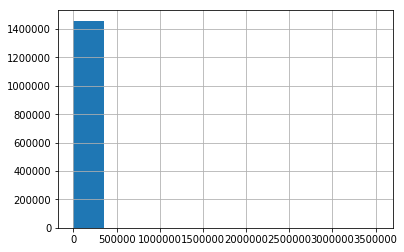

In [6]:
df_train['trip_duration'].hist()

In [9]:
def euclidean_dist(pick_long, pick_lat, drop_long, drop_lat):
    """
    Function to get euclidean distance between the pickup and dropoff points
    """
    dist = np.sqrt((pick_long - drop_long)**2 + (pick_lat - drop_lat)**2)
    return dist

def manhattan_dist(pick_long, pick_lat, drop_long, drop_lat):
    """
    Function to get manhattan distance between the pickup and dropoff points
    """
    dist = np.sqrt(np.abs(pick_long - drop_long) + np.abs(pick_lat - drop_lat))
    return dist



In [18]:
def late_night (row):
    if (row['hour'] <= 6) or (row['hour'] >= 20):
        return 1
    else:
        return 0


def night (row):
    if ((row['hour'] <= 20) and (row['hour'] >= 16)) and (row['weekday'] < 5):
        return 1
    else:
        return 0

def create_additional_variables(df):
    df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
    df['year'] = df['pickup_datetime'].apply(lambda x: x.year)
    df['month'] = df['pickup_datetime'].apply(lambda x: x.month)
    df['day'] = df['pickup_datetime'].apply(lambda x: x.day)
    df['hour'] = df['pickup_datetime'].apply(lambda x: x.hour)
    df['weekday'] = df['pickup_datetime'].apply(lambda x: x.weekday())
    #df['pickup_datetime'] =  df['pickup_datetime'].apply(lambda x: str(x))
    df['night'] = df.apply (lambda x: night(x), axis=1)
    df['late_night'] = df.apply (lambda x: late_night(x), axis=1)
    
    lat1 = df['pickup_latitude']
    lat2 = df['dropoff_latitude']
    lon1 = df['pickup_longitude']
    lon2 = df['dropoff_longitude']
    
    # Add new features
    df['latdiff'] = (lat1 - lat2)
    df['londiff'] = (lon1 - lon2)
    df['euclidean_distance'] = euclidean_dist(df['pickup_longitude'], df['pickup_latitude'],
                                               df['dropoff_longitude'], df['dropoff_latitude'])
    df['manhattan_distance'] = manhattan_dist(df['pickup_longitude'], df['pickup_latitude'],
                                               df['dropoff_longitude'], df['dropoff_latitude'])
    return df

In [35]:
df_train = create_additional_variables(df_train)
df_train = pd.get_dummies(df_train, columns=['store_and_fwd_flag'])

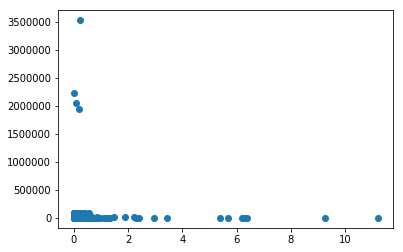

In [11]:
plt.scatter(df_train['euclidean_distance'], df_train['trip_duration'])

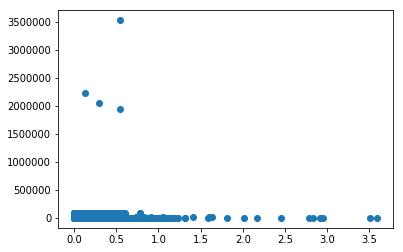

In [12]:
plt.scatter(df_train['manhattan_distance'], df_train['trip_duration'])

In [20]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,manhattan_distance,year,month,day,hour,weekday,night,late_night,latdiff,londiff
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,0.140923,2016,3,14,17,0,1,0,0.002335,-0.017525
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0.162720,2016,6,12,0,6,0,1,0.007412,0.019066
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,0.283122,2016,1,19,11,1,0,0,0.053852,0.026306
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,0.124419,2016,4,6,19,2,1,0,0.013252,0.002228
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,0.104012,2016,3,26,13,5,0,0,0.010689,-0.000130


In [27]:
df_train['store_and_fwd_flag'].unique()

array(['N', 'Y'], dtype=object)

In [22]:
df_train.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'euclidean_distance', 'manhattan_distance', 'year',
       'month', 'day', 'hour', 'weekday', 'night', 'late_night', 'latdiff',
       'londiff'],
      dtype='object')

In [36]:
features = ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 
        'euclidean_distance', 'manhattan_distance', 'year',
       'month', 'day', 'hour', 'weekday', 'night', 'late_night', 'latdiff',
       'londiff','store_and_fwd_flag_N', 'store_and_fwd_flag_Y']
target = 'trip_duration'

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split( df_train[features] , df_train[target], test_size=0.33, random_state=42)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,...,month,day,hour,weekday,night,late_night,latdiff,londiff,store_and_fwd_flag_N,store_and_fwd_flag_Y
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,455,...,3,14,17,0,1,0,0.002335,-0.017525,1,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,663,...,6,12,0,6,0,1,0.007412,0.019066,1,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,2124,...,1,19,11,1,0,0,0.053852,0.026306,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,429,...,4,6,19,2,1,0,0.013252,0.002228,1,0
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,435,...,3,26,13,5,0,0,0.010689,-0.000130,1,0
5,id0801584,2,2016-01-30 22:01:40,2016-01-30 22:09:03,6,-73.982857,40.742195,-73.992081,40.749184,443,...,1,30,22,5,0,1,-0.006989,0.009224,1,0
6,id1813257,1,2016-06-17 22:34:59,2016-06-17 22:40:40,4,-73.969017,40.757839,-73.957405,40.765896,341,...,6,17,22,4,0,1,-0.008057,-0.011612,1,0
7,id1324603,2,2016-05-21 07:54:58,2016-05-21 08:20:49,1,-73.969276,40.797779,-73.922470,40.760559,1551,...,5,21,7,5,0,0,0.037220,-0.046806,1,0
8,id1301050,1,2016-05-27 23:12:23,2016-05-27 23:16:38,1,-73.999481,40.738400,-73.985786,40.732815,255,...,5,27,23,4,0,1,0.005585,-0.013695,1,0
9,id0012891,2,2016-03-10 21:45:01,2016-03-10 22:05:26,1,-73.981049,40.744339,-73.973000,40.789989,1225,...,3,10,21,3,0,1,-0.045650,-0.008049,1,0


In [38]:
max_depth = 20
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth, random_state=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [41]:
pred_train = rf.predict(X_train)
pred_validation = rf.predict(X_validation)

In [42]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, pred_train))  
print('Mean Squared Error:', metrics.mean_squared_error(y_train, pred_train))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, pred_train)))  

Mean Absolute Error: 276.9253773135103
Mean Squared Error: 6853174.94629061
Root Mean Squared Error: 2617.8569377050785


In [43]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_validation, pred_validation))  
print('Mean Squared Error:', metrics.mean_squared_error(y_validation, pred_validation))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_validation, pred_validation)))  

Mean Absolute Error: 415.69445576819584
Mean Squared Error: 11289332.979775738
Root Mean Squared Error: 3359.9602646126245


In [46]:
print('Mean Absolute Percentage Error:', np.mean(np.abs(y_train - pred_train)/y_train))  
print('Mean Absolute Percentage Error:', np.mean(np.abs(y_validation - pred_validation)/y_validation))  

Mean Absolute Percentage Error: 0.48549477566195076
Mean Absolute Percentage Error: 0.7080855082487539


In [47]:
# Submission data 

df_test = pd.read_csv("data/test.csv")
df_test = create_additional_variables(df_test)
df_test = pd.get_dummies(df_test, columns=['store_and_fwd_flag'])


In [48]:
pred_test = rf.predict(df_test[features])

In [49]:
submission = pd.DataFrame({'id':df_test['id'], 'trip_duration':pred_test})

In [50]:
submission.head()

,id,trip_duration
0,id3004672,874.742368
1,id3505355,708.034549
2,id1217141,469.021433
3,id2150126,1144.982552
4,id1598245,390.658077


In [52]:
submission.to_csv("submission_result.csv",index= False)